In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

2023-05-22 13:57:13.492211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.model_selection import train_test_split
x_train_base, x_val_base, y_train_base, y_val_base = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [3]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow(x_train, y_train, batch_size=32, subset='training')
val_gen = datagen.flow(x_train, y_train, batch_size=32, subset='validation')

In [4]:
import matplotlib.pyplot as plt

def draw(history, epochsNum):
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    epochs = range(1, epochsNum+1)

    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [5]:
modelShape = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [6]:
modelBase = tf.keras.models.clone_model(modelShape)

modelBase.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

historyBase = modelBase.fit(x_train_base, y_train_base, epochs=20, validation_data=(x_val_base, y_val_base))

2023-05-22 13:58:11.922302: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/20
1250/1250 [==============================] - 37s 28ms/step - loss: 1.7493 - accuracy: 0.3498 - val_loss: 1.3428 - val_accuracy: 0.5124
Epoch 2/20
1250/1250 [==============================] - 35s 28ms/step - loss: 1.3760 - accuracy: 0.5067 - val_loss: 1.1701 - val_accuracy: 0.5900
Epoch 3/20
1250/1250 [==============================] - 35s 28ms/step - loss: 1.2275 - accuracy: 0.5651 - val_loss: 1.0574 - val_accuracy: 0.6162
Epoch 4/20
1250/1250 [==============================] - 35s 28ms/step - loss: 1.1248 - accuracy: 0.6001 - val_loss: 1.0226 - val_accuracy: 0.6435
Epoch 5/20
1250/1250 [==============================] - 35s 28ms/step - loss: 1.0469 - accuracy: 0.6287 - val_loss: 0.9046 - val_accuracy: 0.6789
Epoch 6/20
1250/1250 [==============================] - 35s 28ms/step - loss: 0.9929 - accuracy: 0.6507 - val_loss: 0.8766 - val_accuracy: 0.6891
Epoch 7/20
1250/1250 [==============================] - 35s 28ms/step - loss: 0.9474 - accuracy: 0.6680 - val_loss: 0.8558 -

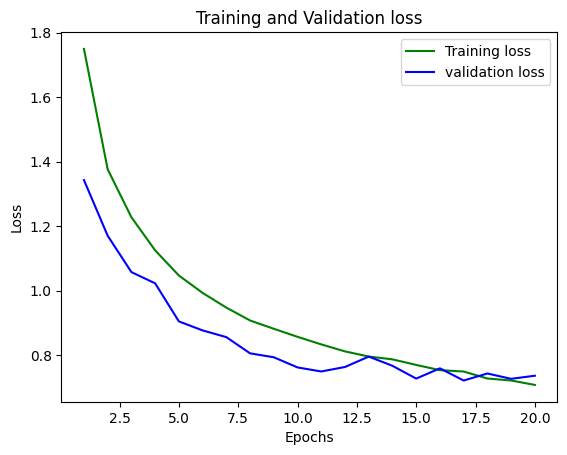

In [7]:
draw(historyBase, 20)

In [17]:
modelBase.evaluate(x_test,  y_test, verbose=2)

2023-05-22 16:56:04.463773: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - loss: 0.7421 - accuracy: 0.7466 - 1s/epoch - 4ms/step


[0.7421329021453857, 0.7465999722480774]

In [15]:
modelAug = tf.keras.models.clone_model(modelShape)

modelAug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

historyAug = modelAug.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=50,
    validation_data=val_gen,
    validation_steps=len(val_gen)
)

Epoch 1/50
1250/1250 [==============================] - 38s 30ms/step - loss: 1.8040 - accuracy: 0.3296 - val_loss: 1.4635 - val_accuracy: 0.4640
Epoch 2/50
1250/1250 [==============================] - 38s 30ms/step - loss: 1.4877 - accuracy: 0.4581 - val_loss: 1.3147 - val_accuracy: 0.5228
Epoch 3/50
1250/1250 [==============================] - 38s 30ms/step - loss: 1.3816 - accuracy: 0.5029 - val_loss: 1.2310 - val_accuracy: 0.5534
Epoch 4/50
1250/1250 [==============================] - 38s 30ms/step - loss: 1.3019 - accuracy: 0.5339 - val_loss: 1.1592 - val_accuracy: 0.5802
Epoch 5/50
1250/1250 [==============================] - 38s 31ms/step - loss: 1.2469 - accuracy: 0.5559 - val_loss: 1.1024 - val_accuracy: 0.6107
Epoch 6/50
1250/1250 [==============================] - 38s 30ms/step - loss: 1.1984 - accuracy: 0.5752 - val_loss: 1.0402 - val_accuracy: 0.6355
Epoch 7/50
1250/1250 [==============================] - 38s 30ms/step - loss: 1.1543 - accuracy: 0.5935 - val_loss: 1.0419 -

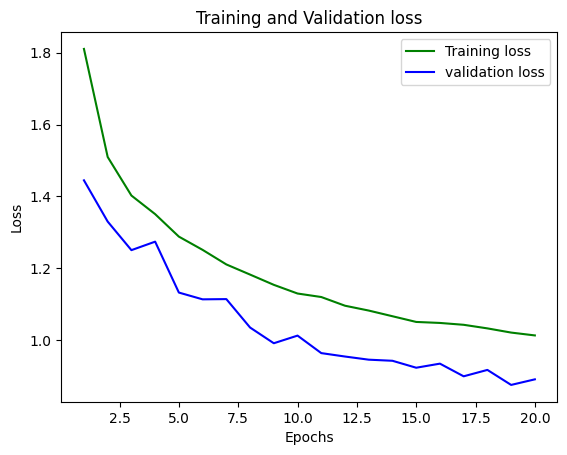

In [9]:
draw(historyAug, 20)

In [16]:
modelAug.evaluate(x_test,  y_test, verbose=2)

2023-05-22 16:55:32.349020: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - loss: 0.7649 - accuracy: 0.7399 - 1s/epoch - 4ms/step


[0.764864444732666, 0.7398999929428101]

In [27]:
modelVGGLoad = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

counter = 0
for layer in modelVGGLoad.layers:
    counter+=1
    if counter<=16:
        layer.trainable = False

x = modelVGGLoad.output
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
out = layers.Dense(10, activation='softmax')(x)

modelVGG = tf.keras.models.Model(inputs=modelVGGLoad.input, outputs=out)

In [28]:
modelVGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

historyVGG = modelVGG.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=20,
    validation_data=val_gen,
    validation_steps=len(val_gen)
)

Epoch 1/20
1250/1250 [==============================] - 160s 128ms/step - loss: 1.3310 - accuracy: 0.5302 - val_loss: 1.2171 - val_accuracy: 0.5797
Epoch 2/20
1250/1250 [==============================] - 159s 127ms/step - loss: 1.1027 - accuracy: 0.6157 - val_loss: 1.0416 - val_accuracy: 0.6353
Epoch 3/20
1250/1250 [==============================] - 159s 127ms/step - loss: 1.0319 - accuracy: 0.6399 - val_loss: 1.0723 - val_accuracy: 0.6352
Epoch 4/20
1250/1250 [==============================] - 159s 127ms/step - loss: 0.9874 - accuracy: 0.6559 - val_loss: 1.0179 - val_accuracy: 0.6535
Epoch 5/20
1250/1250 [==============================] - 159s 127ms/step - loss: 0.9484 - accuracy: 0.6684 - val_loss: 1.0162 - val_accuracy: 0.6444
Epoch 6/20
1250/1250 [==============================] - 159s 127ms/step - loss: 0.9193 - accuracy: 0.6769 - val_loss: 0.9822 - val_accuracy: 0.6588
Epoch 7/20
1250/1250 [==============================] - 159s 127ms/step - loss: 0.8954 - accuracy: 0.6836 - val_

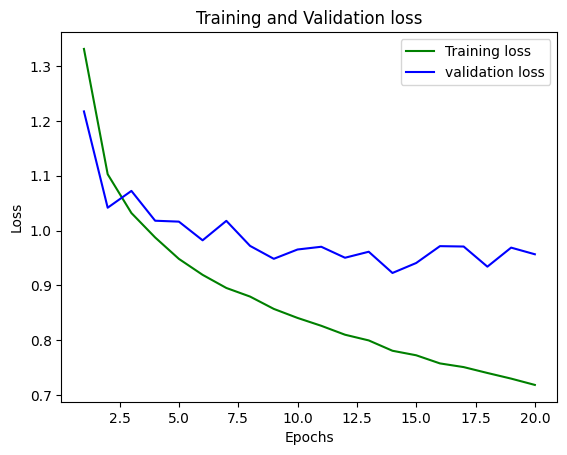

In [29]:
draw(historyVGG, 20)

In [30]:
modelVGG.evaluate(x_test,  y_test, verbose=2)

313/313 - 14s - loss: 0.9486 - accuracy: 0.7017 - 14s/epoch - 43ms/step


[0.94863361120224, 0.70169997215271]

In [33]:
modelResNetLoad = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

counter = 0

for layer in modelResNetLoad.layers:
    counter+=1
    if counter<=170:
        layer.trainable = False

x = modelResNetLoad.output
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
out = layers.Dense(10, activation='softmax')(x)

modelResNet = tf.keras.models.Model(inputs=modelResNetLoad.input, outputs=out)

In [34]:
modelResNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

historyResNet = modelResNet.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=20,
    validation_data=val_gen,
    validation_steps=len(val_gen)
)

Epoch 1/20
1250/1250 [==============================] - 61s 47ms/step - loss: 1.8727 - accuracy: 0.3299 - val_loss: 2.4851 - val_accuracy: 0.1523
Epoch 2/20
1250/1250 [==============================] - 59s 47ms/step - loss: 1.7616 - accuracy: 0.3690 - val_loss: 3.5883 - val_accuracy: 0.1884
Epoch 3/20
1250/1250 [==============================] - 59s 47ms/step - loss: 1.7210 - accuracy: 0.3831 - val_loss: 2.0548 - val_accuracy: 0.2588
Epoch 4/20
1250/1250 [==============================] - 59s 47ms/step - loss: 1.6878 - accuracy: 0.3951 - val_loss: 2.5901 - val_accuracy: 0.2241
Epoch 5/20
1250/1250 [==============================] - 59s 47ms/step - loss: 1.6672 - accuracy: 0.4031 - val_loss: 3.1618 - val_accuracy: 0.1650
Epoch 6/20
1250/1250 [==============================] - 59s 47ms/step - loss: 1.6525 - accuracy: 0.4135 - val_loss: 2.9638 - val_accuracy: 0.1478
Epoch 7/20
1250/1250 [==============================] - 59s 47ms/step - loss: 1.6416 - accuracy: 0.4149 - val_loss: 2.3589 -

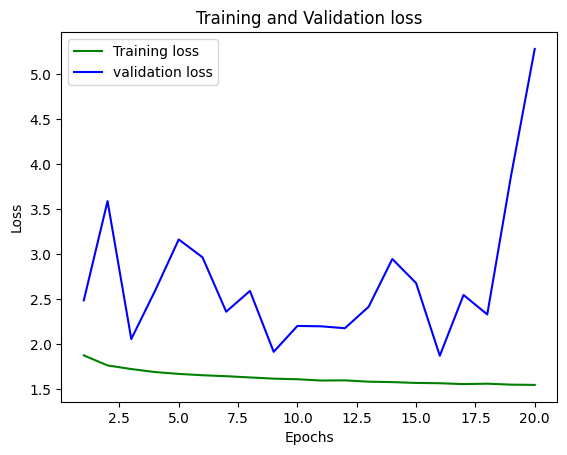

In [35]:
draw(historyResNet, 20)

In [36]:
modelResNet.evaluate(x_test,  y_test, verbose=2)

313/313 - 9s - loss: 4.9318 - accuracy: 0.1801 - 9s/epoch - 28ms/step


[4.9317851066589355, 0.1800999939441681]